In [2]:
import numpy as np
# Install the required libraries
!pip install numpy
!pip install tensorflow
!pip install matplotlib

# Now you can import the libraries and use them in your code
import numpy as np
import tensorflow as tf
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Permute, Bidirectional, BatchNormalization, Conv2D, LSTM, Dense, Dropout, ELU, Flatten, MaxPool2D, TimeDistributed
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [3]:
import numpy as np
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

X_train_valid = X_train_valid[:, :22, :]
X_test = X_test[:, :22, :]
y_train_valid = to_categorical(y_train_valid - 769)
y_test = to_categorical(y_test - 769)



#cleaning data even further
#adding noise to the data for better generalization
# X_train_valid = X_train_valid + np.random.normal(0, 0.5, X_train_valid.shape)
# X_test = X_test + np.random.normal(0, 0.5, X_test.shape)


### Shape of data

In [4]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115, 4)
Test target shape: (443, 4)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, BatchNormalization, ELU, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.metrics import categorical_accuracy

# Load data
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")

X_train_valid = X_train_valid[:, :22, :]
X_test = X_test[:, :22, :]
y_train_valid = to_categorical(y_train_valid - 769)
y_test = to_categorical(y_test - 769)

In [37]:
def cnn_model(time_period=1000):
    model = Sequential()

    # 1D Convolutional layers
    model.add(Conv1D(filters=32, kernel_size=10, strides=1, padding='valid',
                     kernel_regularizer=L1L2(l1=0.0, l2=0.01),
                     input_shape=(time_period, 22)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Dropout(0.5))

    # Additional 1D Convolutional layers
    model.add(Conv1D(filters=64, kernel_size=10, strides=1, padding='valid',
                     kernel_regularizer=L1L2(l1=0.0, l2=0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Dropout(0.5))

    model.add(Conv1D(filters=128, kernel_size=10, strides=1, padding='valid',
                     kernel_regularizer=L1L2(l1=0.0, l2=0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Dropout(0.5))

    # Flatten before Dense layers
    model.add(Flatten())

    # Dense layers with L2 regularization
    model.add(Dense(64, activation='relu', kernel_regularizer=L1L2(l1=0.0, l2=0.01)))
    model.add(Dense(32, activation='relu', kernel_regularizer=L1L2(l1=0.0, l2=0.01)))
    model.add(Dense(16, activation='relu', kernel_regularizer=L1L2(l1=0.0, l2=0.01)))
    model.add(Dense(4, activation='softmax', kernel_regularizer=L1L2(l1=0, l2=0.01)))

    # Learning rate schedule
    lr_schedule = ExponentialDecay(initial_learning_rate=0.001, decay_steps=100000, decay_rate=0.96, staircase=True)

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=lr_schedule, epsilon=1e-8),
                  metrics=[CategoricalAccuracy()])

    return model

def cnn_model_smaller_than_450(time_period=450):
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(1, 5), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01), input_shape=(22, time_period, 1), data_format='channels_last'))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, kernel_size=(1, 5), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, kernel_size=(1, 5), strides=1, padding='valid', kernel_regularizer=L1L2(l1=0, l2=0.01)))
    model.add(ELU())
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(4, kernel_regularizer=L1L2(l1=0, l2=0.01), activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, epsilon=1e-8, decay=0.01), metrics=[categorical_accuracy])
    
    return model

def train_data(time_period=1000):
    # Different period of time
    X_train_valid_cur = X_train_valid[:, :, :time_period]
    y_train_valid_cur = y_train_valid
    X_test_cur = X_test[:, :, :time_period]
    y_test_cur = y_test

    # Preprocess data
    if time_period < 450:
        # For Conv2D, add a channel dimension
        X_train_valid_cur = X_train_valid_cur.reshape((-1, 22, time_period, 1))
        X_test_cur = X_test_cur.reshape((-1, 22, time_period, 1))
        model = cnn_model_smaller_than_450(time_period)
    else:
        # For Conv1D, transpose to match input shape expected by Conv1D
        X_train_valid_cur = X_train_valid_cur.transpose((0, 2, 1))
        X_test_cur = X_test_cur.transpose((0, 2, 1))
        model = cnn_model(time_period)

    model.fit(X_train_valid_cur, y_train_valid_cur, epochs=40, batch_size=32, validation_data=(X_test_cur, y_test_cur), shuffle=True, verbose=1)
    train_score = model.evaluate(X_train_valid_cur, y_train_valid_cur)
    test_score = model.evaluate(X_test_cur, y_test_cur)

    print('train {:s}: {:.3f}%'.format(model.metrics_names[1], train_score[1]*100))
    print('test {:s}: {:.3f}%'.format(model.metrics_names[1], test_score[1]*100))
    print(model.summary())

    return train_score, test_score




In [39]:
# Example usage
train_score, test_score = train_data(1000)

Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - categorical_accuracy: 0.2561 - loss: 4.9283 - val_categorical_accuracy: 0.2212 - val_loss: 4.1865
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - categorical_accuracy: 0.2930 - loss: 3.9125 - val_categorical_accuracy: 0.3160 - val_loss: 3.3209
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - categorical_accuracy: 0.3234 - loss: 3.1606 - val_categorical_accuracy: 0.3002 - val_loss: 2.7387
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - categorical_accuracy: 0.3321 - loss: 2.6132 - val_categorical_accuracy: 0.3138 - val_loss: 2.3746
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.4058 - loss: 2.1990 - val_categorical_accuracy: 0.3792 - val_loss: 2.0854
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.4245 - loss: 1.9771 - val_categorical_accuracy: 0.4131 - val_loss: 1.8635
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - categorical_accuracy: 0.4273 - loss: 1.81

Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_177 (Conv1D)             │ (None, 991, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_207 (ELU)                   │ (None, 991, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_207         │ (None, 991, 32)        │         3,964 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_176               │ (None, 247, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_207 (Dropout)           │ (None, 247, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_178 (Conv1D)             │ (None, 238, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_208 (ELU)                   │ (None, 238, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_208         │ (None, 238, 64)        │           952 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_177               │ (None, 59, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_208 (Dropout)           │ (None, 59, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_179 (Conv1D)             │ (None, 50, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_209 (ELU)                   │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_209         │ (None, 50, 128)        │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_178               │ (None, 12, 128)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_209 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_67 (Flatten)            │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_242 (Dense)               │ (None, 64)             │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_243 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_244 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_245 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,357 (2.45 MB)

 Trainable params: 213,266 (833.07 KB)

 Non-trainable params: 2,558 (9.99 KB)

 Optimizer params: 426,533 (1.63 MB)

None


=================100===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - categorical_accuracy: 0.2953 - loss: 3.4687 - val_categorical_accuracy: 0.3612 - val_loss: 2.8878
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.3822 - loss: 2.3935 - val_categorical_accuracy: 0.4537 - val_loss: 2.1541
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - categorical_accuracy: 0.4141 - loss: 2.1387 - val_categorical_accuracy: 0.3973 - val_loss: 1.9692
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.4378 - loss: 1.9932 - val_categorical_accuracy: 0.3928 - val_loss: 1.9881
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.4554 - loss: 1.9781 - val_categorical_accuracy: 0.4199 - val_loss: 1.8853
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.4602 - loss: 1.8896 - val_categorical_accuracy: 0.4312 - val_loss: 1.8364
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - c

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 22, 96, 16)     │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_150 (ELU)                   │ (None, 22, 96, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_150         │ (None, 22, 96, 16)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 22, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_150 (Dropout)           │ (None, 22, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 22, 44, 32)     │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_151 (ELU)                   │ (None, 22, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_151         │ (None, 22, 44, 32)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_151 (Dropout)           │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 22, 18, 64)     │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_152 (ELU)                   │ (None, 22, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_152         │ (None, 22, 18, 64)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 22, 9, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_152 (Dropout)           │ (None, 22, 9, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_48 (Flatten)            │ (None, 12672)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_187 (Dense)               │ (None, 4)              │        50,692 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,582 (748.37 KB)

 Trainable params: 63,816 (249.28 KB)

 Non-trainable params: 132 (528.00 B)

 Optimizer params: 127,634 (498.57 KB)

None
=================150===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - categorical_accuracy: 0.2910 - loss: 4.3557 - val_categorical_accuracy: 0.3815 - val_loss: 3.1479
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - categorical_accuracy: 0.3800 - loss: 2.7607 - val_categorical_accuracy: 0.3454 - val_loss: 3.6374
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - categorical_accuracy: 0.4257 - loss: 2.4537 - val_categorical_accuracy: 0.4176 - val_loss: 2.6395
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - categorical_accuracy: 0.4384 - loss: 2.1932 - val_categorical_accuracy: 0.4289 - val_loss: 2.3539
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - categorical_accuracy: 0.4320 - loss: 2.1095 - val_categorical_accuracy: 0.4063 - val_loss: 2.0188
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - categorical_accuracy: 0.5119 - loss: 1.8750 - val_categorical_accuracy: 0.3657 - val_loss: 2.2971
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/ste

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 22, 146, 16)    │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_153 (ELU)                   │ (None, 22, 146, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_153         │ (None, 22, 146, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 22, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_153 (Dropout)           │ (None, 22, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 22, 69, 32)     │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_154 (ELU)                   │ (None, 22, 69, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_154         │ (None, 22, 69, 32)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 22, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_154 (Dropout)           │ (None, 22, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 22, 30, 64)     │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_155 (ELU)                   │ (None, 22, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_155         │ (None, 22, 30, 64)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 22, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_155 (Dropout)           │ (None, 22, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_49 (Flatten)            │ (None, 21120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_188 (Dense)               │ (None, 4)              │        84,484 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,958 (1.12 MB)

 Trainable params: 97,608 (381.28 KB)

 Non-trainable params: 132 (528.00 B)

 Optimizer params: 195,218 (762.57 KB)

None
=================200===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - categorical_accuracy: 0.3041 - loss: 4.3939 - val_categorical_accuracy: 0.3860 - val_loss: 3.0133
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - categorical_accuracy: 0.4077 - loss: 2.6770 - val_categorical_accuracy: 0.3093 - val_loss: 4.2520
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - categorical_accuracy: 0.4374 - loss: 2.9343 - val_categorical_accuracy: 0.4492 - val_loss: 2.4641
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - categorical_accuracy: 0.5432 - loss: 2.0861 - val_categorical_accuracy: 0.3905 - val_loss: 2.6476
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - categorical_accuracy: 0.5070 - loss: 2.1784 - val_categorical_accuracy: 0.4221 - val_loss: 2.4841
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - categorical_accuracy: 0.5713 - loss: 1.9827 - val_categorical_accuracy: 0.4176 - val_loss: 2.6569
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/ste

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 22, 196, 16)    │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_156 (ELU)                   │ (None, 22, 196, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_156         │ (None, 22, 196, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 22, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_156 (Dropout)           │ (None, 22, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 22, 94, 32)     │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_157 (ELU)                   │ (None, 22, 94, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_157         │ (None, 22, 94, 32)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 22, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_157 (Dropout)           │ (None, 22, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 22, 43, 64)     │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_158 (ELU)                   │ (None, 22, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_158         │ (None, 22, 43, 64)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 22, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_158 (Dropout)           │ (None, 22, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_50 (Flatten)            │ (None, 29568)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_189 (Dense)               │ (None, 4)              │       118,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,334 (1.50 MB)

 Trainable params: 131,400 (513.28 KB)

 Non-trainable params: 132 (528.00 B)

 Optimizer params: 262,802 (1.00 MB)

None
=================250===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - categorical_accuracy: 0.3239 - loss: 6.8631 - val_categorical_accuracy: 0.2957 - val_loss: 8.1829
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - categorical_accuracy: 0.4177 - loss: 3.1668 - val_categorical_accuracy: 0.4379 - val_loss: 2.9790
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - categorical_accuracy: 0.4701 - loss: 2.6266 - val_categorical_accuracy: 0.3567 - val_loss: 3.0631
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - categorical_accuracy: 0.5125 - loss: 2.3513 - val_categorical_accuracy: 0.3837 - val_loss: 3.3855
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - categorical_accuracy: 0.4978 - loss: 2.3822 - val_categorical_accuracy: 0.3702 - val_loss: 2.6482
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - categorical_accuracy: 0.5695 - loss: 1.9985 - val_categorical_accuracy: 0.4357 - val_loss: 2.2988
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/ste

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 22, 246, 16)    │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_159 (ELU)                   │ (None, 22, 246, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_159         │ (None, 22, 246, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 22, 123, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_159 (Dropout)           │ (None, 22, 123, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 22, 119, 32)    │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_160 (ELU)                   │ (None, 22, 119, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_160         │ (None, 22, 119, 32)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 22, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_160 (Dropout)           │ (None, 22, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 22, 55, 64)     │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_161 (ELU)                   │ (None, 22, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_161         │ (None, 22, 55, 64)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 22, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_161 (Dropout)           │ (None, 22, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_51 (Flatten)            │ (None, 38016)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_190 (Dense)               │ (None, 4)              │       152,068 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,710 (1.89 MB)

 Trainable params: 165,192 (645.28 KB)

 Non-trainable params: 132 (528.00 B)

 Optimizer params: 330,386 (1.26 MB)

None
=================300===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - categorical_accuracy: 0.3004 - loss: 8.6249 - val_categorical_accuracy: 0.3251 - val_loss: 7.5219
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - categorical_accuracy: 0.4055 - loss: 3.5135 - val_categorical_accuracy: 0.4312 - val_loss: 3.1401
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - categorical_accuracy: 0.4903 - loss: 2.7673 - val_categorical_accuracy: 0.3792 - val_loss: 2.8547
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - categorical_accuracy: 0.5351 - loss: 2.5703 - val_categorical_accuracy: 0.4018 - val_loss: 2.9248
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - categorical_accuracy: 0.5101 - loss: 2.6082 - val_categorical_accuracy: 0.4379 - val_loss: 2.9080
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - categorical_accuracy: 0.5457 - loss: 2.3396 - val_categorical_accuracy: 0.4086 - val_loss: 3.0081
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 22, 296, 16)    │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_162 (ELU)                   │ (None, 22, 296, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_162         │ (None, 22, 296, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 22, 148, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_162 (Dropout)           │ (None, 22, 148, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 22, 144, 32)    │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_163 (ELU)                   │ (None, 22, 144, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_163         │ (None, 22, 144, 32)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 22, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_163 (Dropout)           │ (None, 22, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 22, 68, 64)     │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_164 (ELU)                   │ (None, 22, 68, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_164         │ (None, 22, 68, 64)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 22, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_164 (Dropout)           │ (None, 22, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_52 (Flatten)            │ (None, 47872)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_191 (Dense)               │ (None, 4)              │       191,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 613,982 (2.34 MB)

 Trainable params: 204,616 (799.28 KB)

 Non-trainable params: 132 (528.00 B)

 Optimizer params: 409,234 (1.56 MB)

None
=================350===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 208ms/step - categorical_accuracy: 0.3140 - loss: 8.2449 - val_categorical_accuracy: 0.3679 - val_loss: 7.1310
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - categorical_accuracy: 0.4465 - loss: 3.3154 - val_categorical_accuracy: 0.4086 - val_loss: 3.4322
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 203ms/step - categorical_accuracy: 0.4943 - loss: 2.5606 - val_categorical_accuracy: 0.4199 - val_loss: 3.0730
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - categorical_accuracy: 0.5549 - loss: 2.2600 - val_categorical_accuracy: 0.3634 - val_loss: 3.5756
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - categorical_accuracy: 0.5633 - loss: 2.3574 - val_categorical_accuracy: 0.4312 - val_loss: 3.0710
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - categorical_accuracy: 0.6325 - loss: 2.0592 - val_categorical_accuracy: 0.4108 - val_loss: 3.2936
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 22, 346, 16)    │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_165 (ELU)                   │ (None, 22, 346, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_165         │ (None, 22, 346, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 22, 173, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_165 (Dropout)           │ (None, 22, 173, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 22, 169, 32)    │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_166 (ELU)                   │ (None, 22, 169, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_166         │ (None, 22, 169, 32)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 22, 84, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_166 (Dropout)           │ (None, 22, 84, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 22, 80, 64)     │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_167 (ELU)                   │ (None, 22, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_167         │ (None, 22, 80, 64)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 22, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_167 (Dropout)           │ (None, 22, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_53 (Flatten)            │ (None, 56320)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 4)              │       225,284 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 715,358 (2.73 MB)

 Trainable params: 238,408 (931.28 KB)

 Non-trainable params: 132 (528.00 B)

 Optimizer params: 476,818 (1.82 MB)

None
=================400===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 215ms/step - categorical_accuracy: 0.3240 - loss: 8.7310 - val_categorical_accuracy: 0.3296 - val_loss: 6.7244
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - categorical_accuracy: 0.4356 - loss: 4.1414 - val_categorical_accuracy: 0.3860 - val_loss: 4.7342
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 218ms/step - categorical_accuracy: 0.5575 - loss: 3.0588 - val_categorical_accuracy: 0.4244 - val_loss: 4.0532
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - categorical_accuracy: 0.6039 - loss: 2.4185 - val_categorical_accuracy: 0.3657 - val_loss: 4.1404
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - categorical_accuracy: 0.6059 - loss: 2.2472 - val_categorical_accuracy: 0.4334 - val_loss: 3.1638
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - categorical_accuracy: 0.6463 - loss: 2.1465 - val_categorical_accuracy: 0.4537 - val_loss: 3.0083
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 9

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 22, 396, 16)    │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_168 (ELU)                   │ (None, 22, 396, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_168         │ (None, 22, 396, 16)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 22, 198, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_168 (Dropout)           │ (None, 22, 198, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 22, 194, 32)    │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_169 (ELU)                   │ (None, 22, 194, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_169         │ (None, 22, 194, 32)    │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 22, 97, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_169 (Dropout)           │ (None, 22, 97, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 22, 93, 64)     │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_170 (ELU)                   │ (None, 22, 93, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_170         │ (None, 22, 93, 64)     │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 22, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_170 (Dropout)           │ (None, 22, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_54 (Flatten)            │ (None, 64768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 4)              │       259,076 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 816,734 (3.12 MB)

 Trainable params: 272,200 (1.04 MB)

 Non-trainable params: 132 (528.00 B)

 Optimizer params: 544,402 (2.08 MB)

None
=================450===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - categorical_accuracy: 0.2513 - loss: 4.6843 - val_categorical_accuracy: 0.2596 - val_loss: 3.8809
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - categorical_accuracy: 0.2537 - loss: 3.6459 - val_categorical_accuracy: 0.2912 - val_loss: 2.9905
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.3049 - loss: 2.8234 - val_categorical_accuracy: 0.3431 - val_loss: 2.4029
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.3381 - loss: 2.2866 - val_categorical_accuracy: 0.3454 - val_loss: 2.0508
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.3345 - loss: 1.9886 - val_categorical_accuracy: 0.3792 - val_loss: 1.8238
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.3892 - loss: 1.7505 - val_categorical_accuracy: 0.4199 - val_loss: 1.6755
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/ste

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_141 (Conv1D)             │ (None, 441, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_171 (ELU)                   │ (None, 441, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_171         │ (None, 441, 32)        │         1,764 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_140               │ (None, 110, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_171 (Dropout)           │ (None, 110, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_142 (Conv1D)             │ (None, 101, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_172 (ELU)                   │ (None, 101, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_172         │ (None, 101, 64)        │           404 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_141               │ (None, 25, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_172 (Dropout)           │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_143 (Conv1D)             │ (None, 16, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_173 (ELU)                   │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_173         │ (None, 16, 128)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_142               │ (None, 4, 128)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_173 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_55 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_196 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_197 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 439,981 (1.68 MB)

 Trainable params: 146,288 (571.44 KB)

 Non-trainable params: 1,116 (4.36 KB)

 Optimizer params: 292,577 (1.12 MB)

None
=================500===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - categorical_accuracy: 0.2404 - loss: 4.7256 - val_categorical_accuracy: 0.2912 - val_loss: 3.9210
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - categorical_accuracy: 0.3038 - loss: 3.6707 - val_categorical_accuracy: 0.3318 - val_loss: 3.0414
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.3348 - loss: 2.8760 - val_categorical_accuracy: 0.3657 - val_loss: 2.4447
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - categorical_accuracy: 0.3552 - loss: 2.3371 - val_categorical_accuracy: 0.3725 - val_loss: 2.0913
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.3709 - loss: 1.9872 - val_categorical_accuracy: 0.3860 - val_loss: 1.8555
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - categorical_accuracy: 0.4124 - loss: 1.7859 - val_categorical_accuracy: 0.4244 - val_loss: 1.7264
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/ste

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_144 (Conv1D)             │ (None, 491, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_174 (ELU)                   │ (None, 491, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_174         │ (None, 491, 32)        │         1,964 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_143               │ (None, 122, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_174 (Dropout)           │ (None, 122, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_145 (Conv1D)             │ (None, 113, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_175 (ELU)                   │ (None, 113, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_175         │ (None, 113, 64)        │           452 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_144               │ (None, 28, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_175 (Dropout)           │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_146 (Conv1D)             │ (None, 19, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_176 (ELU)                   │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_176         │ (None, 19, 128)        │            76 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_145               │ (None, 4, 128)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_176 (Dropout)           │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_56 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_198 (Dense)               │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_199 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_200 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_201 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 440,501 (1.68 MB)

 Trainable params: 146,418 (571.95 KB)

 Non-trainable params: 1,246 (4.87 KB)

 Optimizer params: 292,837 (1.12 MB)

None
=================550===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - categorical_accuracy: 0.2395 - loss: 4.7868 - val_categorical_accuracy: 0.2777 - val_loss: 4.0462
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - categorical_accuracy: 0.2715 - loss: 3.8105 - val_categorical_accuracy: 0.3183 - val_loss: 3.1787
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.2902 - loss: 3.0190 - val_categorical_accuracy: 0.3476 - val_loss: 2.5671
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.3442 - loss: 2.4451 - val_categorical_accuracy: 0.3770 - val_loss: 2.1757
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.4006 - loss: 2.0571 - val_categorical_accuracy: 0.3815 - val_loss: 1.9119
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - categorical_accuracy: 0.4165 - loss: 1.8431 - val_categorical_accuracy: 0.4289 - val_loss: 1.7425
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/ste

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_147 (Conv1D)             │ (None, 541, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_177 (ELU)                   │ (None, 541, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_177         │ (None, 541, 32)        │         2,164 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_146               │ (None, 135, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_177 (Dropout)           │ (None, 135, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_148 (Conv1D)             │ (None, 126, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_178 (ELU)                   │ (None, 126, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_178         │ (None, 126, 64)        │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_147               │ (None, 31, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_178 (Dropout)           │ (None, 31, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_149 (Conv1D)             │ (None, 22, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_179 (ELU)                   │ (None, 22, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_179         │ (None, 22, 128)        │            88 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_148               │ (None, 5, 128)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_179 (Dropout)           │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_57 (Flatten)            │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_202 (Dense)               │ (None, 64)             │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_203 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_204 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_205 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,605 (1.78 MB)

 Trainable params: 154,742 (604.46 KB)

 Non-trainable params: 1,378 (5.38 KB)

 Optimizer params: 309,485 (1.18 MB)

None
=================600===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - categorical_accuracy: 0.2557 - loss: 4.7276 - val_categorical_accuracy: 0.3002 - val_loss: 3.9462
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.2858 - loss: 3.7131 - val_categorical_accuracy: 0.3138 - val_loss: 3.0877
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.3040 - loss: 2.9242 - val_categorical_accuracy: 0.3341 - val_loss: 2.4895
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.3432 - loss: 2.3873 - val_categorical_accuracy: 0.2799 - val_loss: 2.1542
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.3697 - loss: 2.0551 - val_categorical_accuracy: 0.3950 - val_loss: 1.8936
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.4280 - loss: 1.7927 - val_categorical_accuracy: 0.3544 - val_loss: 1.7656
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/ste

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_150 (Conv1D)             │ (None, 591, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_180 (ELU)                   │ (None, 591, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_180         │ (None, 591, 32)        │         2,364 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_149               │ (None, 147, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_180 (Dropout)           │ (None, 147, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_151 (Conv1D)             │ (None, 138, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_181 (ELU)                   │ (None, 138, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_181         │ (None, 138, 64)        │           552 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_150               │ (None, 34, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_181 (Dropout)           │ (None, 34, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_152 (Conv1D)             │ (None, 25, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_182 (ELU)                   │ (None, 25, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_182         │ (None, 25, 128)        │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_151               │ (None, 6, 128)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_182 (Dropout)           │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_58 (Flatten)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_206 (Dense)               │ (None, 64)             │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_207 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_208 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 490,701 (1.87 MB)

 Trainable params: 163,064 (636.97 KB)

 Non-trainable params: 1,508 (5.89 KB)

 Optimizer params: 326,129 (1.24 MB)

None
=================650===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - categorical_accuracy: 0.2530 - loss: 4.6867 - val_categorical_accuracy: 0.3273 - val_loss: 3.8520
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - categorical_accuracy: 0.2855 - loss: 3.6151 - val_categorical_accuracy: 0.3205 - val_loss: 2.9230
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - categorical_accuracy: 0.3485 - loss: 2.7702 - val_categorical_accuracy: 0.3860 - val_loss: 2.3455
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - categorical_accuracy: 0.3802 - loss: 2.2198 - val_categorical_accuracy: 0.3567 - val_loss: 2.0183
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - categorical_accuracy: 0.3840 - loss: 1.9070 - val_categorical_accuracy: 0.3747 - val_loss: 1.7800
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - categorical_accuracy: 0.4449 - loss: 1.6888 - val_categorical_accuracy: 0.4244 - val_loss: 1.6517
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/ste

Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_153 (Conv1D)             │ (None, 641, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_183 (ELU)                   │ (None, 641, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_183         │ (None, 641, 32)        │         2,564 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_152               │ (None, 160, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_183 (Dropout)           │ (None, 160, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_154 (Conv1D)             │ (None, 151, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_184 (ELU)                   │ (None, 151, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_184         │ (None, 151, 64)        │           604 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_153               │ (None, 37, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_184 (Dropout)           │ (None, 37, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_155 (Conv1D)             │ (None, 28, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_185 (ELU)                   │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_185         │ (None, 28, 128)        │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_154               │ (None, 7, 128)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_185 (Dropout)           │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_59 (Flatten)            │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 64)             │        57,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,805 (1.97 MB)

 Trainable params: 171,388 (669.48 KB)

 Non-trainable params: 1,640 (6.41 KB)

 Optimizer params: 342,777 (1.31 MB)

None
=================700===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - categorical_accuracy: 0.2341 - loss: 4.9347 - val_categorical_accuracy: 0.2190 - val_loss: 4.1026
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - categorical_accuracy: 0.2613 - loss: 3.8929 - val_categorical_accuracy: 0.2596 - val_loss: 3.2883
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - categorical_accuracy: 0.2776 - loss: 3.1275 - val_categorical_accuracy: 0.3454 - val_loss: 2.6733
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - categorical_accuracy: 0.3141 - loss: 2.5638 - val_categorical_accuracy: 0.3363 - val_loss: 2.2752
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - categorical_accuracy: 0.3879 - loss: 2.1503 - val_categorical_accuracy: 0.3747 - val_loss: 2.0066
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - categorical_accuracy: 0.4205 - loss: 1.9013 - val_categorical_accuracy: 0.4018 - val_loss: 1.8130
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/ste

Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_156 (Conv1D)             │ (None, 691, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_186 (ELU)                   │ (None, 691, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_186         │ (None, 691, 32)        │         2,764 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_155               │ (None, 172, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_186 (Dropout)           │ (None, 172, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_157 (Conv1D)             │ (None, 163, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_187 (ELU)                   │ (None, 163, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_187         │ (None, 163, 64)        │           652 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_156               │ (None, 40, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_187 (Dropout)           │ (None, 40, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_158 (Conv1D)             │ (None, 31, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_188 (ELU)                   │ (None, 31, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_188         │ (None, 31, 128)        │           124 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_157               │ (None, 7, 128)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_188 (Dropout)           │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_60 (Flatten)            │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_214 (Dense)               │ (None, 64)             │        57,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_215 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_216 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_217 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 516,325 (1.97 MB)

 Trainable params: 171,518 (669.99 KB)

 Non-trainable params: 1,770 (6.91 KB)

 Optimizer params: 343,037 (1.31 MB)

None
=================750===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - categorical_accuracy: 0.2556 - loss: 4.7644 - val_categorical_accuracy: 0.2483 - val_loss: 3.8707
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - categorical_accuracy: 0.2793 - loss: 3.6233 - val_categorical_accuracy: 0.3002 - val_loss: 2.9549
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - categorical_accuracy: 0.3042 - loss: 2.7760 - val_categorical_accuracy: 0.3521 - val_loss: 2.3569
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - categorical_accuracy: 0.3237 - loss: 2.2502 - val_categorical_accuracy: 0.3363 - val_loss: 2.0188
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - categorical_accuracy: 0.3849 - loss: 1.9126 - val_categorical_accuracy: 0.3634 - val_loss: 1.7708
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - categorical_accuracy: 0.3818 - loss: 1.7270 - val_categorical_accuracy: 0.3499 - val_loss: 1.6801
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/ste

Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_159 (Conv1D)             │ (None, 741, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_189 (ELU)                   │ (None, 741, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_189         │ (None, 741, 32)        │         2,964 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_158               │ (None, 185, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_189 (Dropout)           │ (None, 185, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_160 (Conv1D)             │ (None, 176, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_190 (ELU)                   │ (None, 176, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_190         │ (None, 176, 64)        │           704 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_159               │ (None, 44, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_190 (Dropout)           │ (None, 44, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_161 (Conv1D)             │ (None, 35, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_191 (ELU)                   │ (None, 35, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_191         │ (None, 35, 128)        │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_160               │ (None, 8, 128)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_191 (Dropout)           │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_61 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_218 (Dense)               │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_219 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_220 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_221 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,437 (2.07 MB)

 Trainable params: 179,844 (702.52 KB)

 Non-trainable params: 1,904 (7.44 KB)

 Optimizer params: 359,689 (1.37 MB)

None
=================800===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - categorical_accuracy: 0.2834 - loss: 4.8647 - val_categorical_accuracy: 0.2664 - val_loss: 4.1537
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - categorical_accuracy: 0.2745 - loss: 3.9696 - val_categorical_accuracy: 0.2754 - val_loss: 3.3948
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - categorical_accuracy: 0.2630 - loss: 3.2365 - val_categorical_accuracy: 0.3183 - val_loss: 2.7765
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - categorical_accuracy: 0.2985 - loss: 2.6595 - val_categorical_accuracy: 0.3725 - val_loss: 2.3454
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - categorical_accuracy: 0.3558 - loss: 2.2488 - val_categorical_accuracy: 0.2889 - val_loss: 2.0827
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - categorical_accuracy: 0.3892 - loss: 1.9699 - val_categorical_accuracy: 0.3589 - val_loss: 1.8794
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/ste

Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_162 (Conv1D)             │ (None, 791, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_192 (ELU)                   │ (None, 791, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_192         │ (None, 791, 32)        │         3,164 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_161               │ (None, 197, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_192 (Dropout)           │ (None, 197, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_163 (Conv1D)             │ (None, 188, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_193 (ELU)                   │ (None, 188, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_193         │ (None, 188, 64)        │           752 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_162               │ (None, 47, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_193 (Dropout)           │ (None, 47, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_164 (Conv1D)             │ (None, 38, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_194 (ELU)                   │ (None, 38, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_194         │ (None, 38, 128)        │           152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_163               │ (None, 9, 128)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_194 (Dropout)           │ (None, 9, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_62 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_222 (Dense)               │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_225 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 566,533 (2.16 MB)

 Trainable params: 188,166 (735.02 KB)

 Non-trainable params: 2,034 (7.95 KB)

 Optimizer params: 376,333 (1.44 MB)

None
=================850===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - categorical_accuracy: 0.2662 - loss: 4.8614 - val_categorical_accuracy: 0.2167 - val_loss: 4.0275
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - categorical_accuracy: 0.2579 - loss: 3.7908 - val_categorical_accuracy: 0.2348 - val_loss: 3.1468
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - categorical_accuracy: 0.2476 - loss: 2.9753 - val_categorical_accuracy: 0.2483 - val_loss: 2.5245
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - categorical_accuracy: 0.2621 - loss: 2.4116 - val_categorical_accuracy: 0.2370 - val_loss: 2.1352
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - categorical_accuracy: 0.3111 - loss: 2.0488 - val_categorical_accuracy: 0.2957 - val_loss: 1.8982
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - categorical_accuracy: 0.3258 - loss: 1.8662 - val_categorical_accuracy: 0.3431 - val_loss: 1.7562
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/ste

Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_165 (Conv1D)             │ (None, 841, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_195 (ELU)                   │ (None, 841, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_195         │ (None, 841, 32)        │         3,364 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_164               │ (None, 210, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_195 (Dropout)           │ (None, 210, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_166 (Conv1D)             │ (None, 201, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_196 (ELU)                   │ (None, 201, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_196         │ (None, 201, 64)        │           804 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_165               │ (None, 50, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_196 (Dropout)           │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_167 (Conv1D)             │ (None, 41, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_197 (ELU)                   │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_197         │ (None, 41, 128)        │           164 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_166               │ (None, 10, 128)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_197 (Dropout)           │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_63 (Flatten)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_229 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,637 (2.26 MB)

 Trainable params: 196,490 (767.54 KB)

 Non-trainable params: 2,166 (8.46 KB)

 Optimizer params: 392,981 (1.50 MB)

None
=================900===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - categorical_accuracy: 0.2535 - loss: 4.8801 - val_categorical_accuracy: 0.2709 - val_loss: 4.1450
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - categorical_accuracy: 0.2628 - loss: 3.8888 - val_categorical_accuracy: 0.2619 - val_loss: 3.2802
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - categorical_accuracy: 0.2642 - loss: 3.1177 - val_categorical_accuracy: 0.3296 - val_loss: 2.6672
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - categorical_accuracy: 0.3218 - loss: 2.5532 - val_categorical_accuracy: 0.3386 - val_loss: 2.2484
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - categorical_accuracy: 0.3391 - loss: 2.1745 - val_categorical_accuracy: 0.3341 - val_loss: 2.0006
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - categorical_accuracy: 0.4071 - loss: 1.9198 - val_categorical_accuracy: 0.3273 - val_loss: 1.8550
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/ste

Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_168 (Conv1D)             │ (None, 891, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_198 (ELU)                   │ (None, 891, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_198         │ (None, 891, 32)        │         3,564 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_167               │ (None, 222, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_198 (Dropout)           │ (None, 222, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_169 (Conv1D)             │ (None, 213, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_199 (ELU)                   │ (None, 213, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_199         │ (None, 213, 64)        │           852 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_168               │ (None, 53, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_199 (Dropout)           │ (None, 53, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_170 (Conv1D)             │ (None, 44, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_200 (ELU)                   │ (None, 44, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_200         │ (None, 44, 128)        │           176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_169               │ (None, 11, 128)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_200 (Dropout)           │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_64 (Flatten)            │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_230 (Dense)               │ (None, 64)             │        90,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_231 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_232 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_233 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 616,733 (2.35 MB)

 Trainable params: 204,812 (800.05 KB)

 Non-trainable params: 2,296 (8.97 KB)

 Optimizer params: 409,625 (1.56 MB)

None
=================950===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - categorical_accuracy: 0.2426 - loss: 4.7420 - val_categorical_accuracy: 0.2957 - val_loss: 3.8709
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - categorical_accuracy: 0.2684 - loss: 3.6197 - val_categorical_accuracy: 0.2777 - val_loss: 2.9276
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - categorical_accuracy: 0.2887 - loss: 2.7646 - val_categorical_accuracy: 0.3115 - val_loss: 2.3340
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - categorical_accuracy: 0.3357 - loss: 2.2287 - val_categorical_accuracy: 0.3296 - val_loss: 2.0036
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - categorical_accuracy: 0.3753 - loss: 1.8982 - val_categorical_accuracy: 0.3679 - val_loss: 1.7987
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - categorical_accuracy: 0.4420 - loss: 1.6714 - val_categorical_accuracy: 0.4153 - val_loss: 1.6413
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/ste

Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_171 (Conv1D)             │ (None, 941, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_201 (ELU)                   │ (None, 941, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_201         │ (None, 941, 32)        │         3,764 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_170               │ (None, 235, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_201 (Dropout)           │ (None, 235, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_172 (Conv1D)             │ (None, 226, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_202 (ELU)                   │ (None, 226, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_202         │ (None, 226, 64)        │           904 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_171               │ (None, 56, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_202 (Dropout)           │ (None, 56, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_173 (Conv1D)             │ (None, 47, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_203 (ELU)                   │ (None, 47, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_203         │ (None, 47, 128)        │           188 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_172               │ (None, 11, 128)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_203 (Dropout)           │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_65 (Flatten)            │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_234 (Dense)               │ (None, 64)             │        90,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_235 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_236 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_237 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 617,261 (2.35 MB)

 Trainable params: 204,944 (800.56 KB)

 Non-trainable params: 2,428 (9.48 KB)

 Optimizer params: 409,889 (1.56 MB)

None
=================1000===================
Epoch 1/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - categorical_accuracy: 0.2691 - loss: 4.7277 - val_categorical_accuracy: 0.2460 - val_loss: 3.9281
Epoch 2/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - categorical_accuracy: 0.2873 - loss: 3.6701 - val_categorical_accuracy: 0.2867 - val_loss: 2.9919
Epoch 3/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - categorical_accuracy: 0.3073 - loss: 2.8394 - val_categorical_accuracy: 0.3521 - val_loss: 2.3998
Epoch 4/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - categorical_accuracy: 0.3497 - loss: 2.2678 - val_categorical_accuracy: 0.3431 - val_loss: 2.0586
Epoch 5/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - categorical_accuracy: 0.4130 - loss: 1.9205 - val_categorical_accuracy: 0.4018 - val_loss: 1.8185
Epoch 6/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - categorical_accuracy: 0.4299 - loss: 1.7410 - val_categorical_accuracy: 0.4131 - val_loss: 1.7062
Epoch 7/40
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/st

Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_174 (Conv1D)             │ (None, 991, 32)        │         7,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_204 (ELU)                   │ (None, 991, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_204         │ (None, 991, 32)        │         3,964 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_173               │ (None, 247, 32)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_204 (Dropout)           │ (None, 247, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_175 (Conv1D)             │ (None, 238, 64)        │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_205 (ELU)                   │ (None, 238, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_205         │ (None, 238, 64)        │           952 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_174               │ (None, 59, 64)         │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_205 (Dropout)           │ (None, 59, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_176 (Conv1D)             │ (None, 50, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_206 (ELU)                   │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_206         │ (None, 50, 128)        │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_175               │ (None, 12, 128)        │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_206 (Dropout)           │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_66 (Flatten)            │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_238 (Dense)               │ (None, 64)             │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_239 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_240 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_241 (Dense)               │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,357 (2.45 MB)

 Trainable params: 213,266 (833.07 KB)

 Non-trainable params: 2,558 (9.99 KB)

 Optimizer params: 426,533 (1.63 MB)

None
Train accuracies: 
[0.9418439865112305, 0.972104012966156, 0.9758865237236023, 0.9730496406555176, 0.9697399735450745, 0.9829787015914917, 0.970685601234436, 0.7323877215385437, 0.5943262577056885, 0.5758865475654602, 0.609929084777832, 0.7371158599853516, 0.7262411117553711, 0.5995271801948547, 0.6699763536453247, 0.6439716219902039, 0.7399527430534363, 0.5531914830207825, 0.5791962146759033]
Test accuracies: 
[0.3544017970561981, 0.41534990072250366, 0.3611738085746765, 0.3837471902370453, 0.44469526410102844, 0.42212188243865967, 0.41309255361557007, 0.6433408856391907, 0.4920993149280548, 0.5101580023765564, 0.505643367767334, 0.6207674741744995, 0.6568848490715027, 0.5282167196273804, 0.5711060762405396, 0.5282167196273804, 0.6343114972114563, 0.45146727561950684, 0.48758465051651]
The best accuracy is 0.657.
The corresponding time period is 700.


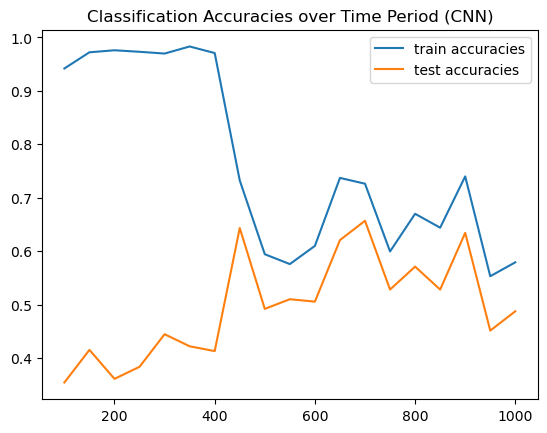

In [38]:
train_scores = []
test_scores = []

for time in range(100, 1001, 50):
    print("=================" + str(time) + "===================")
    train_score, test_score = train_data(time_period=time)
    train_scores.append(train_score[1])
    test_scores.append(test_score[1])

print("Train accuracies: ")
print(train_scores)
print("Test accuracies: ")
print(test_scores)
max_idx = np.argmax(test_scores)
print("The best accuracy is %.3f." %max(test_scores))
print("The corresponding time period is %d." %(100 + 50 * max_idx))

# plot
plt.plot(range(100, 1001, 50), train_scores, label='train accuracies')
plt.plot(range(100, 1001, 50), test_scores, label='test accuracies')
plt.legend()
plt.title("Classification Accuracies over Time Period (CNN)")
plt.show()

In [ ]:
plt.plot(range(100, 1001, 50), train_scores, label='train accuracies')
plt.plot(range(100, 1001, 50), test_scores, label='test accuracies')
plt.legend()
plt.title("Classification Accuracies over Time Period (CNN)")
plt.show()